In [1]:
#importing all the necessary libraries required for the algorithm
import numpy as np
import math
import copy
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#reading the dataset given
df = pd.read_csv('polynomial_train.csv')
arr = df.to_numpy()
arr = np.delete(arr,0,axis=1)
m = len(arr)
n = arr.shape[1]
x_values = np.delete(arr,n-1,axis=1)
print(x_values)
y_values = arr[:,n-1]
print(y_values)

[[-1113.92458108   952.10540425  -276.04588086]
 [-2229.48022767  1111.48856784   -93.4541072 ]
 [ 2717.25771283    53.43123706  -179.22859092]
 ...
 [ -533.44699332  1171.45733504  -130.84092473]
 [ 1810.49910349  -424.11169601  -128.33498562]
 [ -861.91021653   257.2959923   -176.1228714 ]]
[ -1294.28891782 -27146.87008356  64743.00171817 ...   -285.70796526
   8161.59530383   -255.16713134]


In [3]:
#enter the degree of polynomial to find the features
degree = int(input("Enter value of degree : "))

Enter value of degree : 3


In [4]:
#code to add additional features based on degree
tmp = np.zeros((m,1))
for i in range(degree+1):
    for j in range(degree+1):
        for k in range(degree+1):
            if (i+j+k)>degree or (i+j+k)<=1:
                continue
            else:
                tmp = ((x_values[:,0]**i)*(x_values[:,1]**j)*(x_values[:,2]**k))
                tmp = np.reshape(tmp,(m,1))
                x_values = np.hstack((x_values,tmp))
                
#assinging value of n
n = x_values.shape[1]

print(x_values.shape)

(50000, 19)


In [5]:
#to assign initial values to w and b
w_init = np.zeros(n,)
b_init = 0

In [6]:
#to find mean
def mean(x_values,m,n):
    mean = np.zeros(n,)
    for j in range(n):
        mean[j]  = (np.sum(x_values[:,j]))/m
    return mean

In [7]:
#to find standard deviation
def std_deviation(x_values,mean,m,n):
    summation = np.zeros(n,)
    standard_deviation = np.zeros(n,)
    for j in range(n):
        summation[j] = (np.sum((x_values[:,j]-mean[j])**2))/m
        standard_deviation[j] = math.sqrt(summation[j])
    return standard_deviation

In [8]:
#implementing the z score normalization
def z_score(x_values,m,n):
    avg = mean(x_values,m,n)
    standard_deviation = std_deviation(x_values,avg,m,n)
    x_modified = np.zeros_like(x_values)
    for j in range(n):
        x_modified[:,j]= ((x_values[:,j]-avg[j])/standard_deviation[j])
    return x_modified

In [9]:
#finding cost function
def cost_func(x_values,y_values,m,w,b):
    y_predicted=np.zeros(m)
    cost=0
    for i in range(m):
        #finding the predicted value of y (y_cap)
        y_predicted[i] = ((np.dot(w,x_values[i]))+b)
    #finding cost
    cost = np.sum((y_predicted-y_values)**2)
    final_cost = (cost/(2*m)) 
    return final_cost

In [10]:
#to find rmse
def rmse(x_values,y_values,m,w,b):
    cost = cost_func(x_values,y_values,m,w,b)
    rms = math.sqrt((cost)*2)
    return rms

In [11]:
def r2(x_values,y_values,w,b,m,n):
    y_cap = (np.matmul(x_values,w)+b)
    y_mean = np.sum(y_values)/m
    r2 = np.sum((y_values-y_cap)**2)/np.sum((y_values-y_mean)**2)
    return 1-r2

In [12]:
#finding the derivative of w and b 
def derivative(x_values,y_values,m,n,w,b):
    y_predicted = np.zeros(m)
    derivative_w = np.zeros(n)
    derivative_b=0
    #finding the predicted value 
    y_predicted = np.matmul(x_values,w)
    #finding the loss
    loss = (y_predicted-y_values)
    for j in range(n):
        derivative_w[j] = np.sum((loss*x_values[:,j]))
    derivative_b = np.sum(loss)
    derivative_w = derivative_w/m
    derivative_b = derivative_b/m
    
    return derivative_w,derivative_b

In [13]:
#performing he gradiant descent for the given values
def gradiant_decent(x_values,y_values,m,n,w,b,alpha,num_iterations):
    w_temp = copy.deepcopy(w)
    b_temp = b
    loss_arr = np.zeros(num_iterations,)
    #running loop of 'no. of iterations times':
    for i in range(num_iterations):
        #finding derivative of w and b
        derivative_w,derivative_b = derivative(x_values,y_values,m,n,w_temp,b_temp)
        #changing the values of w and b
        w_temp = w_temp - (alpha*derivative_w)
        b_temp = b_temp - (alpha*derivative_b)
        #storing the loss
        loss_arr[i]=cost_func(x_values,y_values,m,w_temp,b_temp)
        #printing the loss
        if(i%50==0):
            loss = cost_func(x_values,y_values,m,w_temp,b_temp)
            rms = rmse(x_values,y_values,m,w_temp,b_temp)
            print("The loss after "+str(i)+" iterations is "+str(loss)+" and the rmse is "+str(rms))
    return w_temp,b_temp,loss_arr

In [14]:
def polynomial_regression(x_values,y_values,m,n,w,b,alpha,num_iterations):
    loss_ar = np.zeros(num_iterations)
    w_tmp,b_tmp,loss_ar = gradiant_decent(x_values,y_values,m,n,w,b,alpha,num_iterations)
    print("The values of w and b are "+str(w_tmp)+" "+str(b_tmp))
    return w_tmp,b_tmp,loss_ar

In [15]:
num_iterations = int(input("enter number of iterations. : "))

enter number of iterations. : 1500


In [16]:
w_final = np.zeros(n,)
b_final =  0
loss_array = np.zeros(num_iterations,)
x_modified = z_score(x_values,m,n)
w_final,b_final,loss_array = polynomial_regression(x_modified,y_values,m,n,w_init,b_init,0.01,num_iterations)

The loss after 0 iterations is 3233662531253.5405 and the rmse is 2543093.600815173
The loss after 50 iterations is 1605974696767.4236 and the rmse is 1792191.226832351
The loss after 100 iterations is 1202618918316.034 and the rmse is 1550882.9216391763
The loss after 150 iterations is 955932906049.1771 and the rmse is 1382702.358462715
The loss after 200 iterations is 791831883203.7151 and the rmse is 1258437.0331516115
The loss after 250 iterations is 679385193083.9714 and the rmse is 1165663.0671716174
The loss after 300 iterations is 600624807080.5433 and the rmse is 1096015.3348202235
The loss after 350 iterations is 544306754650.98895 and the rmse is 1043366.4309828919
The loss after 400 iterations is 503188468265.8813 and the rmse is 1003183.4012441407
The loss after 450 iterations is 472534402489.56995 and the rmse is 972146.4935796147
The loss after 500 iterations is 449212631263.5922 and the rmse is 947852.9751639673
The loss after 550 iterations is 431127775741.0116 and the

In [17]:
r2(x_modified,y_values,w_final,b_final,m,n)

0.8944251767004523

In [ ]:
print(w_final,b_final)
print(loss_array)

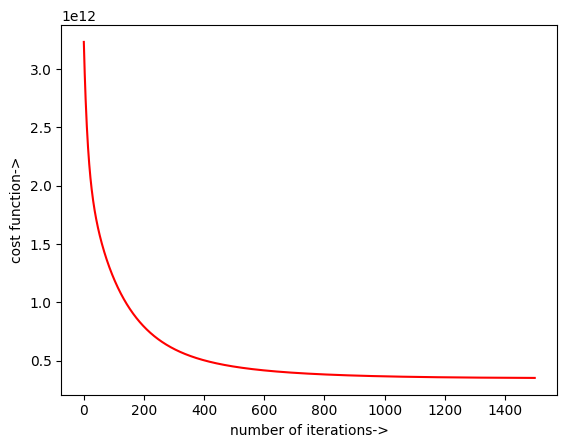

In [18]:
#plot the graph of iterations vs cost function
plt.plot(np.arange(1500),loss_array,c='r')
plt.xlabel('number of iterations->')
plt.ylabel('cost function->')
plt.show()

In [ ]:
#plotting y values with respect to feature A
plt.scatter((x_values[:,0]),y_values,c='blue',marker='x')
li =[]
for i in range(n):
    tmp = np.random.randint(-10000,10000)
    li.append(tmp)
    
#plt.scatter(li,(li*w_final)+b_final,c='blue')
plt.xlabel('x->')
plt.ylabel('y->')
plt.show()

In [ ]:
#ploting y values with respect to feature B
plt.scatter(x_values[:,1],y_values,c='red',marker='.')
plt.xlabel('x->')
plt.ylabel('y->')
plt.show()

In [ ]:
#ploting y values with respect to feature C
plt.scatter(x_values[:,2],y_values,c='red',marker='.')
plt.xlabel('x->')
plt.ylabel('y->')
plt.show()

In [ ]:
#reading the dataset given
df = pd.read_csv('polynomial_test_data.csv')
arr_test = df.to_numpy()
m_test = len(arr_test)
n_test = arr_test.shape[1]
x_values_test = np.delete(arr_test,0,axis=1)
print(x_values_test)
y_values_test = arr_test[:,0]
print(y_values_test)

In [ ]:
plt.scatter(x_values_test[:,2],y_values_test,c='red',marker='.')
li =[]
for i in range(n):
    tmp = np.random.randint(-10000,10000)
    li.append(tmp)
    
#plt.scatter(li,(li*w_final)+b_final,c='blue')
plt.xlabel('x->')
plt.ylabel('y->')
plt.show()